<a href="https://colab.research.google.com/github/poorvitha02/Poorvitha-/blob/main/Assignment%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ CSV file 'customer_churn.csv' created successfully.

📊 Original Data:
    CustomerID  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0        1001  Female   35       5   12000.50              2        1.0   
1        1002    Male   42       3       0.00              1        0.0   
2        1003  Female   29       2   35000.75              2        1.0   
3        1004    Male   50       8  150000.00              2        1.0   
4        1005  Female   37       4   13000.00              1        0.0   

   IsActiveMember  EstimatedSalary  Exited  
0               1          50000.0       0  
1               0          60000.0       1  
2               1          52000.0       0  
3               0          70000.0       1  
4               1          30000.0       0  

🔍 Missing Values:
 CustomerID         0
Gender             0
Age                0
Tenure             0
Balance            1
NumOfProducts      0
HasCrCard          1
IsActiveMember     0
EstimatedSalary   

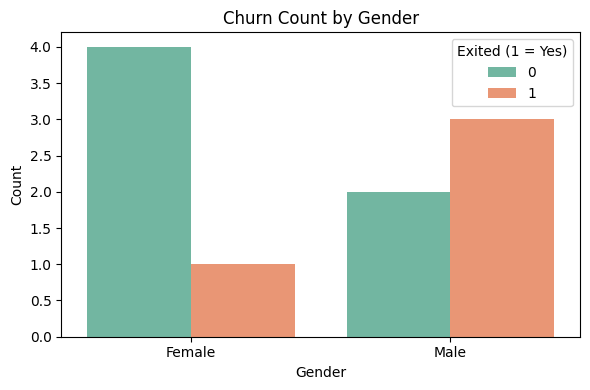

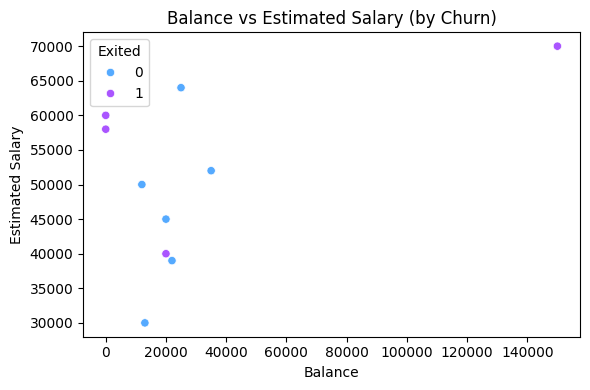

/tmp/ipython-input-1358545315.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Exited', y='balance_salary_ratio', palette='pastel')


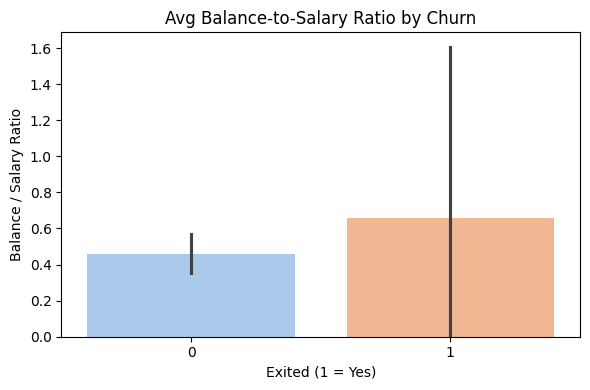

In [3]:



# ---------------- IMPORT LIBRARIES ----------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------- CREATE SAMPLE DATA ----------------
data = {
    "CustomerID": [1001,1002,1003,1004,1005,1006,1007,1008,1009,1010],
    "Gender": ["Female","Male","Female","Male","Female","Male","Female","Male","Female","Male"],
    "Age": [35,42,29,50,37,45,31,39,28,33],
    "Tenure": [5,3,2,8,4,1,6,7,2,3],
    "Balance": [12000.5,0.0,35000.75,150000.0,13000.0,None,20000.0,22000.0,0.0,25000.0],
    "NumOfProducts": [2,1,2,2,1,1,2,2,1,2],
    "HasCrCard": [1,0,1,1,0,1,None,1,1,1],
    "IsActiveMember": [1,0,1,0,1,1,1,1,0,1],
    "EstimatedSalary": [50000.0,60000.0,52000.0,70000.0,30000.0,40000.0,45000.0,39000.0,58000.0,64000.0],
    "Exited": [0,1,0,1,0,1,0,0,1,0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV (optional)
df.to_csv("customer_churn.csv", index=False)
print("✅ CSV file 'customer_churn.csv' created successfully.")

# ---------------- LOAD AND INSPECT DATA ----------------
df = pd.read_csv("customer_churn.csv")
print("\n📊 Original Data:\n", df.head())

# ---------------- CLEANING ----------------

# Check missing values
print("\n🔍 Missing Values:\n", df.isnull().sum())

# Fill missing numerical column (Balance) with median
df['Balance'] = df['Balance'].fillna(df['Balance'].median())

# Fill missing categorical column (HasCrCard) with mode
df['HasCrCard'] = df['HasCrCard'].fillna(df['HasCrCard'].mode()[0])

# Convert column types
df['Gender'] = df['Gender'].astype('category')
df['HasCrCard'] = df['HasCrCard'].astype(int)
df['IsActiveMember'] = df['IsActiveMember'].astype(int)

# ---------------- TRANSFORMATION ----------------

# Create a new column: Balance / EstimatedSalary
df['balance_salary_ratio'] = df['Balance'] / df['EstimatedSalary']

print("\n✅ Cleaned & Transformed Data:\n", df.head())

# ---------------- VISUALIZATION ----------------

# 1. Churn Count by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Exited', palette='Set2')
plt.title("Churn Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Exited (1 = Yes)")
plt.tight_layout()
plt.show()

# 2. Balance vs Salary colored by Churn
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Balance', y='EstimatedSalary', hue='Exited', palette='cool')
plt.title("Balance vs Estimated Salary (by Churn)")
plt.xlabel("Balance")
plt.ylabel("Estimated Salary")
plt.tight_layout()
plt.show()

# 3. Avg Balance/Salary Ratio by Churn
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Exited', y='balance_salary_ratio', palette='pastel')
plt.title("Avg Balance-to-Salary Ratio by Churn")
plt.xlabel("Exited (1 = Yes)")
plt.ylabel("Balance / Salary Ratio")
plt.tight_layout()
plt.show()